# Heart Disease

## Intro

This data set realtes to heart disease.

data source : https://archive.ics.uci.edu/dataset/45/heart+disease


Let's import the libraries we will use for this project:

In [1400]:
import pandas as pd
import matplotlib.pyplot as mplot
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings('ignore')

And we can load the dataframe which we will analyze and base this project on:

In [1401]:
# This loads the actual csv file to a dataframe
heart_data = pd.read_csv('heart_disease_data.csv')

Here is an overview of the entire data:

In [1402]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


We will use diagnosis as the variable we want to predict. There will be relationships between most of the variables listed above and whether or not the patient has got heart disease. We're going to explore the variables and attempt to replicate the distribution of the data in relation to diagnosis.

For the purpose of this project we will only examine a select amount of these variables.

Here are the selected columns we will examine in this project:

These are the descriptions of our attributes:
- **AGE:** in years
- **SEX:** 1 = male, 0 = female
- **CP:** Chest pain
  - 1 = Typical angina
  - 2 = Atypical angina
  - 3 = Non-anginal pain
   - 4 = Asymptomatic
- **CHOL :** serum cholesterol in mg/dL
- **DIAGNOSIS :** 1 = yes , 0 = no


We will update the dataframe to only include the above mentioned columns:

In [1403]:
heart_data = heart_data[['age','chol', 'sex', 'cp','diagnosis']]

heart_data

,age,chol,sex,cp,diagnosis
0,63.0,233.0,1.0,1.0,1
1,67.0,286.0,1.0,4.0,1
2,67.0,229.0,1.0,4.0,1
3,37.0,250.0,1.0,3.0,0
4,41.0,204.0,0.0,2.0,0
...,...,...,...,...,...
292,57.0,241.0,0.0,4.0,1
293,45.0,264.0,1.0,1.0,1
294,68.0,193.0,1.0,4.0,1
295,57.0,131.0,1.0,4.0,1


In [1404]:
heart_data.isnull().sum()

age          0
chol         0
sex          0
cp           0
diagnosis    0
dtype: int64

We can see the data has no null values. Now we can also take a look at some statistics of the data:


In [1405]:
heart_data.describe()

,age,chol,sex,cp,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,247.350168,0.676768,3.158249,0.464646
std,9.049736,51.997583,0.468500,0.964859,0.499590
min,29.000000,126.000000,0.000000,1.000000,0.000000
25%,48.000000,211.000000,0.000000,3.000000,0.000000
50%,56.000000,243.000000,1.000000,3.000000,0.000000
75%,61.000000,276.000000,1.000000,4.000000,1.000000
max,77.000000,564.000000,1.000000,4.000000,1.000000


Now let's create a dataframe which we will load generated data into later:

In [1406]:
gen_data = pd.DataFrame(columns=['age','chol', 'sex', 'cp','diagnosis'])

# Analysis of variables

## Age

Let's see how age is distributed in our dataset:

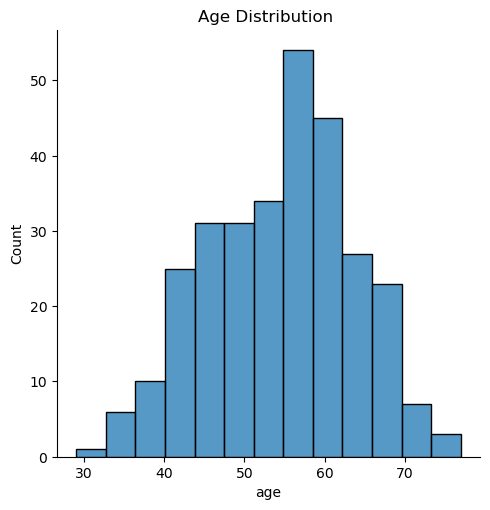

In [1407]:
sb.displot(heart_data, x="age") 
mplot.title("Age Distribution ")
mplot.show()

This tells us the age distribution of all patients are between approx 35 and 75 years old. Age seems to be normally distributed along with the some outliers for under 35 years old and over 75 years old.

Now, let's try to generate our own age variable. Earlier we looked at the stats of our dataset and they showed us an averagre age of 55 and a standard distribution of 9. 



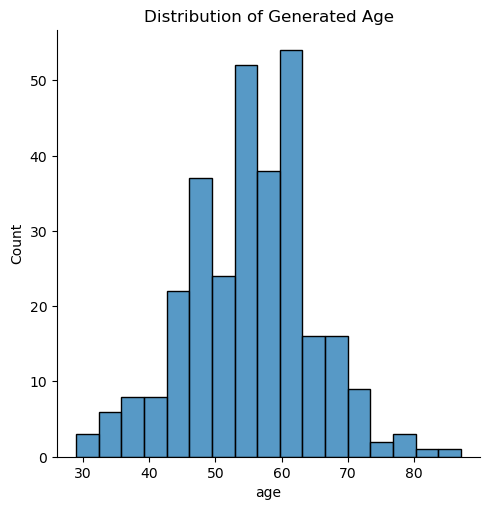

In [1408]:
# Generate age based on the stats of the existing data
# We will generate 300 data points which is similar total to existing dataset
generate_age = np.random.normal(55,9,300)

# Apply the generated age to our generated dataset.
# we want to round age for plotting
gen_data['age'] = generate_age.round(0)

# ensure the column matches datatype in original dataset
gen_data['age'] = gen_data.age.astype('float64') 


sb.displot(gen_data['age'])
mplot.title("Distribution of Generated Age")
mplot.show()

Both the plots from actual dataset and generated dataset have a similar age distribution.

## Diagnosis

First we will look at the breakdown of diagnosis, in terms of who has heart disease vs who does not.

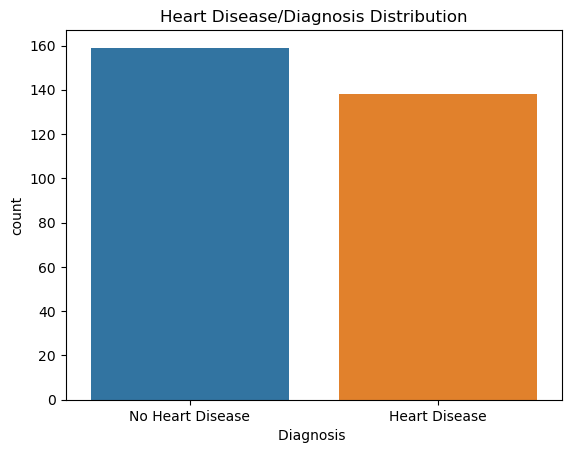

In [1409]:
sb.countplot(heart_data['diagnosis'])
mplot.xlabel("Diagnosis ") 
mplot.title("Heart Disease/Diagnosis Distribution")
bars = ('No Heart Disease', 'Heart Disease')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)

mplot.show()

The data shows approx 50/50 which can lead to an issue whereby a 35 year old could have same chance as 75 year old to have heart disease but research shows that the older you are the more likely you are to get heart disease so let's break down the data by age.

Let's use a temporary column called 'age_breakdown' to further analyze the data:

In [1410]:
# function to breakdown age into groups
def age_breakdown(age):
    if age < 35:
        return 'Very Young'
    elif 35 <= age < 40:
        return 'Quite Young'
    elif 40 <= age < 45:
        return 'Young'
    elif 45 <= age < 55:
        return 'Middle Age'
    else:
        return 'Old'

# assign values from above function to the variable
heart_data['age_breakdown'] = heart_data.age.apply(age_breakdown)

Here is what the data shows:

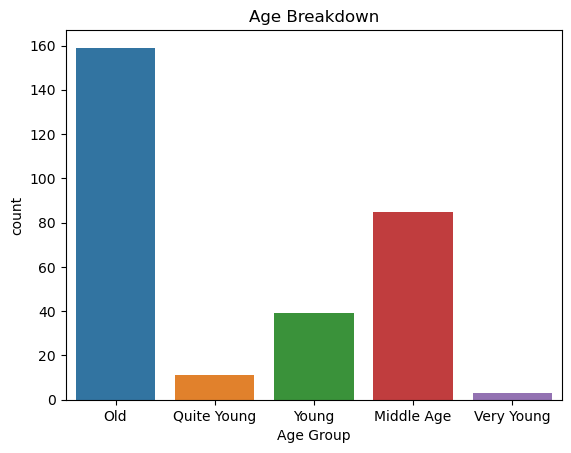

In [1411]:
sb.countplot(heart_data['age_breakdown'])
mplot.xlabel("Age Group")
mplot.title("Age Breakdown")
mplot.show()

We can the older age group is higher the than the younger aged ones. The older aged ones are the biggest category. Now, let's see what the effect age will have on diagnosis .

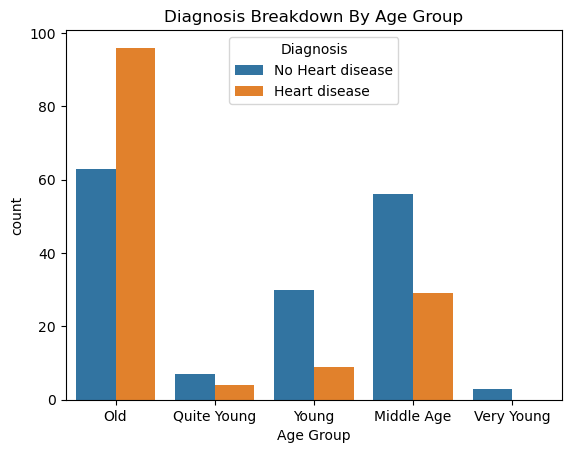

In [1412]:
sb.countplot( x = "age_breakdown", data = heart_data, hue ='diagnosis')
mplot.xlabel("Age Group")
mplot.title("Diagnosis Breakdown By Age Group")
mplot.legend(title='Diagnosis', labels=['No Heart disease','Heart disease'])
mplot.show()

As expected, we see as age increases so does the probablilty of a person having heart disease.

Let's also created a similar temporary 'age_breakdown' column for the generated dataset: 

In [1413]:
# assign age_breakdown using existing function we used for normal dataset
gen_data['age_breakdown'] = gen_data.age.apply(age_breakdown)

We need to calculate probabilty for each age group:

In [1414]:
# Get exact counts for age categories to calculate probablites
print(heart_data.groupby(["age_breakdown","diagnosis"])["diagnosis"].count().unstack())

diagnosis         0     1
age_breakdown            
Middle Age     56.0  29.0
Old            63.0  96.0
Quite Young     7.0   4.0
Very Young      3.0   NaN
Young          30.0   9.0


In [1415]:
# function to calculate diagnosis
def get_diagnosis(age):
    diag = [0,1]
    if age == 'Very Young':
        choice = np.random.choice(diag, 1, p=[0.99, 0.01])
        listToStr = ' '.join(map(str, choice)) 
        return listToStr
    elif  age == 'Quite Young':
        choice = np.random.choice(diag, 1, p=[0.64, 0.36])
        listToStr = ' '.join(map(str, choice)) 
        return listToStr
    elif age == 'Young':
        choice = np.random.choice(diag, 1, p=[0.77, 0.23])
        listToStr = ' '.join(map(str, choice)) 
        return listToStr
    elif age == 'Middle Age':
        choice = np.random.choice(diag, 1, p=[0.66, 0.34])
        listToStr = ' '.join(map(str, choice)) 
        return listToStr
    else:
        choice = np.random.choice(diag, 1, p=[0.40, 0.60])
        listToStr = ' '.join(map(str, choice)) 
        return listToStr


In [1416]:
# apply values to generated diagnosis using above function
gen_data['diagnosis'] = gen_data.age.apply(get_diagnosis)

# ensure data type matches type in original dataset
gen_data['diagnosis'] = gen_data.diagnosis.astype('int64')

We will now see how the generated data looks:

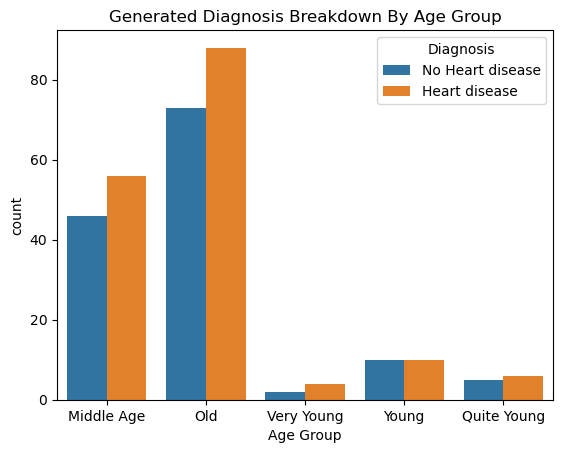

In [1417]:
sb.countplot( x = "age_breakdown", data = gen_data, hue ='diagnosis')
mplot.xlabel("Age Group")
mplot.title("Generated Diagnosis Breakdown By Age Group")
mplot.legend(title='Diagnosis', labels=['No Heart disease','Heart disease'])
mplot.show()

We see that the generated data resembles the actual data for diagnosis per age. Finally let's look at the generated data's overall diagnosis.

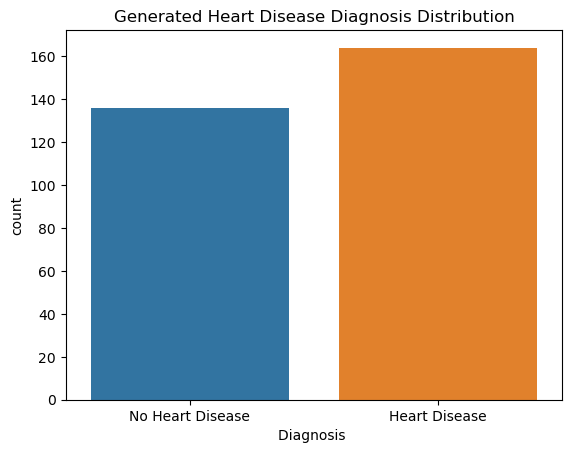

In [1418]:
sb.countplot(gen_data['diagnosis'])
mplot.xlabel("Diagnosis ") 
mplot.title("Generated Heart Disease Diagnosis Distribution")
bars = ('No Heart Disease', 'Heart Disease')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)

mplot.show()

We can see the generated is a close match the the original.

Now we will drop the temporary age_breakdown columns for the real dataset and generated dataset as they are no longer required:

In [1419]:
del gen_data['age_breakdown']
del heart_data['age_breakdown']

# Sex

The next variable to investigate is sex. Let's see the breakdown of existing data:

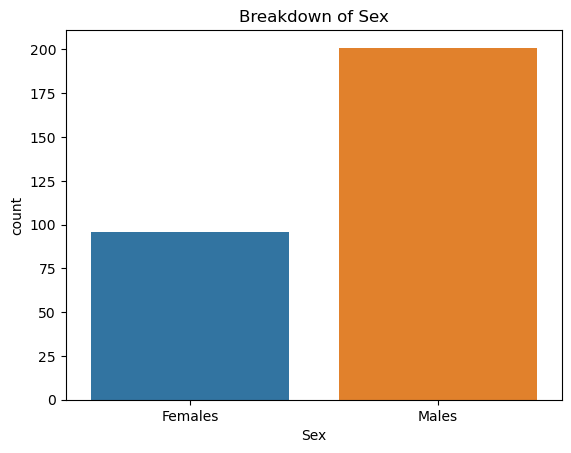

In [1420]:
sb.countplot(x="sex",data=heart_data)
mplot.title("Breakdown of Sex")
mplot.xlabel("Sex")
bars = ('Females', 'Males')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)
mplot.show()

It seems there is approx double the amount of males to females. This makes the ratio of male:female in the dataset 2:1. Now, let's invesigate this in relation to the diagnosis.

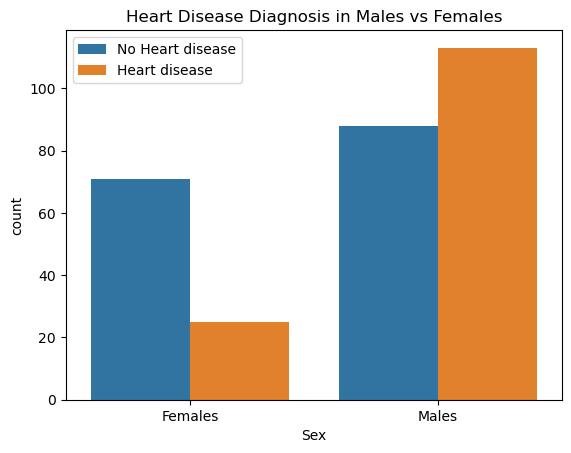

In [1421]:
sb.countplot(x="sex",data=heart_data,hue="diagnosis")
mplot.title("Heart Disease Diagnosis in Males vs Females")
mplot.xlabel("Sex")
bars = ('Females', 'Males')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)
mplot.legend(labels=['No Heart disease','Heart disease'])
mplot.show()

The data very clearly  shows us that heart disease is far more likely to occur in males rather than female patients. Next, we will try to plot this trend in a generated data set.

In [1422]:
# gets counts used to calculate probabiliy
print(heart_data.groupby(["sex","diagnosis"])["diagnosis"].count().unstack())

diagnosis   0    1
sex               
0.0        71   25
1.0        88  113


In [1423]:
def get_gender(diagnosis):
    keys = ['1', '0']
    if diagnosis == 1:
        # change probs for disease
        probs = [0.82, 0.18]
        choice = np.random.choice(keys, 1, replace=True, p=probs)
        listToStr = ' '.join(map(str, choice)) 
        return listToStr
    else:
        probs = [0.45,0.55]
        choice = np.random.choice(keys, 1, replace=True, p=probs)
        listToStr = ' '.join(map(str, choice)) 
        return listToStr

In [1424]:
# apply sex to generated dataset
gen_data['sex'] = gen_data['diagnosis'].apply(get_gender)

# ensure data types matches original dataset
gen_data['sex'] = gen_data.sex.astype('float64')

Time to plot the generated data:

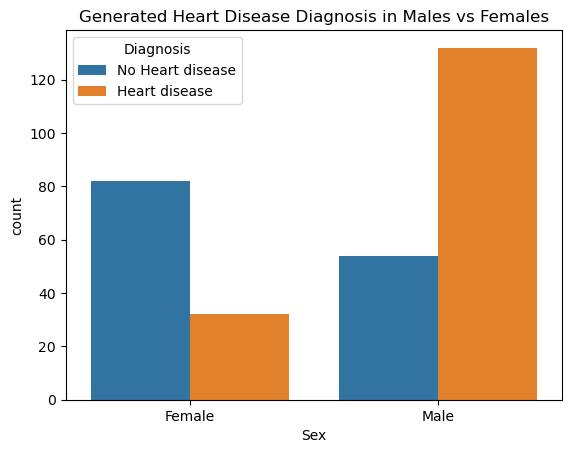

In [1451]:
sb.countplot(x="sex",data=gen_data,hue="diagnosis")
mplot.title("Generated Heart Disease Diagnosis in Males vs Females")
bars = ('Female', 'Male')
y_position = np.arange(len(bars))
mplot.xlabel("Sex")
mplot.xticks(y_position, bars)
mplot.legend(title='Diagnosis', labels=['No Heart disease','Heart disease'])
mplot.show()

This lines up with the original data. Now we will check the breakdown of sexes.

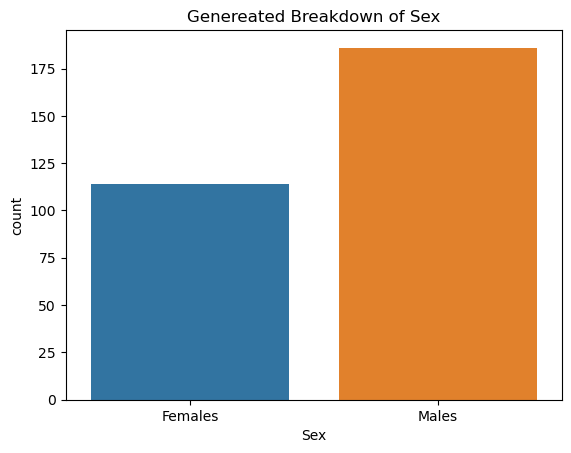

In [1426]:
sb.countplot(x="sex",data=gen_data)
mplot.title("Genereated Breakdown of Sex")
mplot.xlabel("Sex")
bars = ('Females', 'Males')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)
mplot.show()

We can see we still have generated a set where there is close to double the amount of males to females like in the initial data set.

### Chest Pain

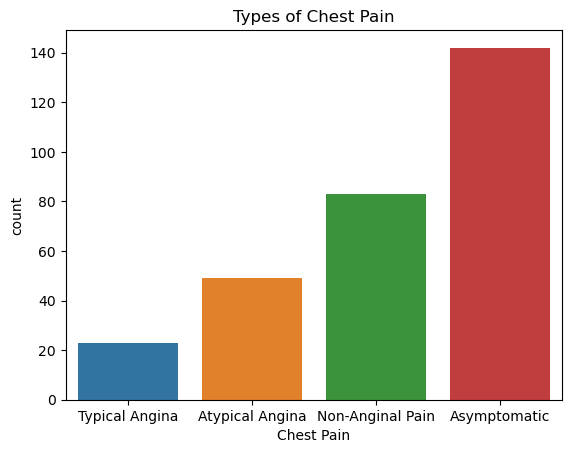

In [1427]:
sb.countplot(heart_data['cp'])
mplot.title("Types of Chest Pain")
mplot.xlabel("Chest Pain")
bars = ('Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)
mplot.show()

Let's now look at this in relation to diagnosis.

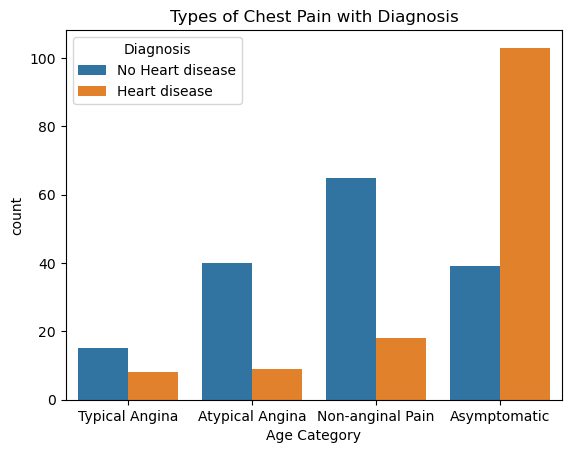

In [1428]:
sb.countplot(x="cp",data=heart_data,hue="diagnosis")
mplot.title("Types of Chest Pain with Diagnosis")
mplot.xlabel("Age Category")
mplot.legend(title='Diagnosis', labels=['No Heart disease','Heart disease'])
bars = ('Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic')
y_postion= np.arange(len(bars))
mplot.xticks(y_position, bars)
mplot.show()

In [1429]:
#get stats of data set to calculate probability below
print(heart_data.groupby(["cp","diagnosis"])["diagnosis"].count().unstack())

diagnosis   0    1
cp                
1.0        15    8
2.0        40    9
3.0        65   18
4.0        39  103


In [1430]:
def cp(diag):
    keys = ['1.0', '2.0', '3.0', '4.0']
    if diag == 1:
        # Probabilities for each chest pain type given heart disease
        probs = [.05, .07, .13, .75]
        # Randomly choose a chest pain type based on the probabilities
        choice = np.random.choice(keys, 1, replace=True, p=probs)

        # Convert the choice to string and return
        return choice[0]
    else:
        # Change probabilities for no disease when diagnosis is 0
        # Probabilities for each chest pain type given no disease
        probs = [0.1, 0.25,0.41,0.24]
        
        # Randomly choose a chest pain type based on the probabilities
        choice = np.random.choice(keys, 1, replace=True, p=probs)

        # Convert the choice to string and return
        return choice[0]
    

In [1431]:
#assign chest pain to generated dataset
gen_data['cp'] = gen_data['diagnosis'].apply(cp)

# ensure data types matches original data set
gen_data['cp'] = gen_data.cp.astype('float64')

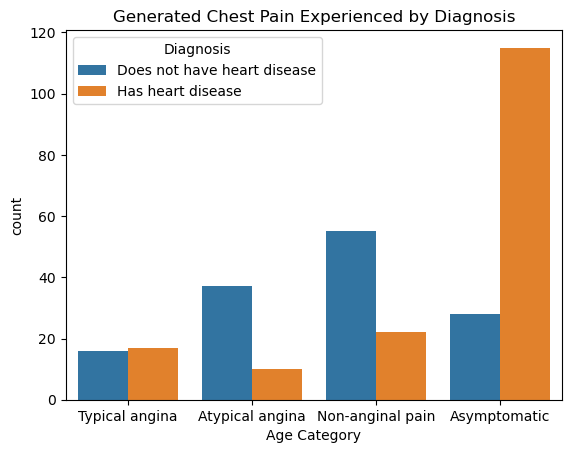

In [1432]:
sb.countplot(x="cp",data=gen_data,hue="diagnosis")
mplot.title("Generated Chest Pain Experienced by Diagnosis")
mplot.xlabel("Age Category")
mplot.legend(title='Diagnosis', labels=['Does not have heart disease','Has heart disease'])
bars = ('Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)
mplot.show()

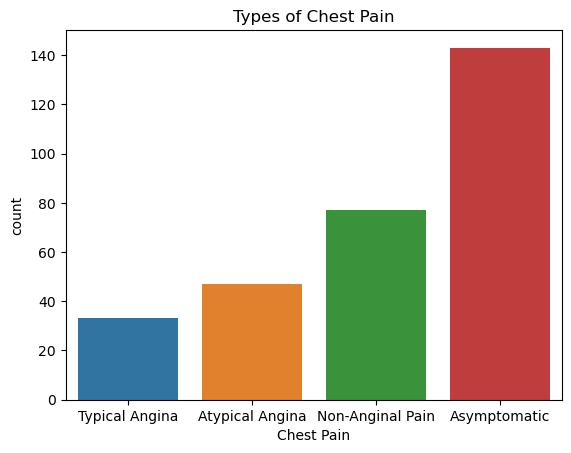

In [1433]:
sb.countplot(gen_data['cp'])
mplot.title("Types of Chest Pain")
mplot.xlabel("Chest Pain")
bars = ('Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic')
y_position = np.arange(len(bars))
mplot.xticks(y_position, bars)
mplot.show()

### 

We can see that the process has generated data in way that Asymptomiatic is still the main type of chest pain but the others have been more evenly distributed.

## Cholesterol

Let's first take a look at the existing data:

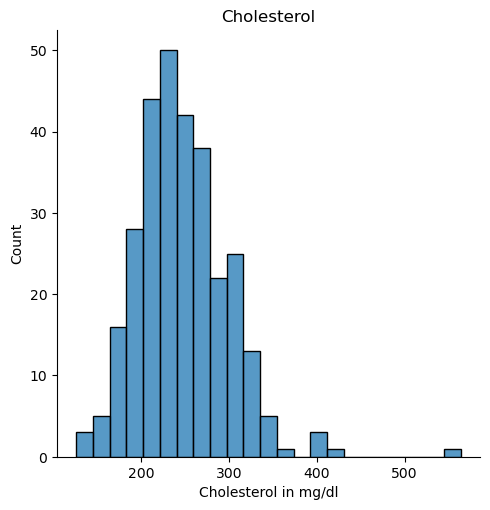

In [1434]:
sb.displot(heart_data['chol'])
mplot.title("Cholesterol")
mplot.xlabel("Cholesterol in mg/dl")
mplot.show()

Cholesterol has a normal distribution along with a couple of outliers. We will now examine this in relation to diagnosis.

In [1435]:
# create data frame for each diagnosis
heart_disease = heart_data.loc[heart_data["diagnosis"]==1]
no_heart_disease = heart_data.loc[heart_data["diagnosis"]==0]

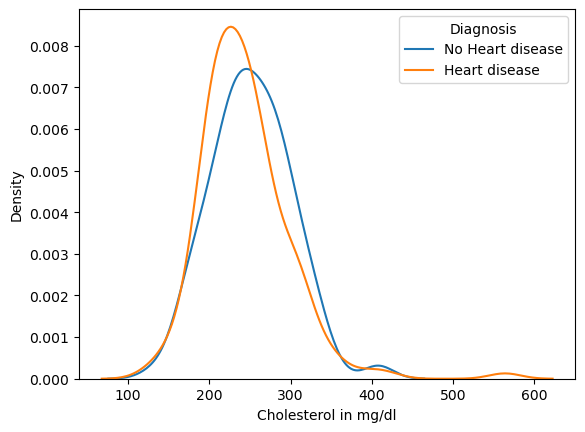

In [1436]:
sb.kdeplot(heart_disease['chol'])
sb.kdeplot(no_heart_disease['chol'])
mplot.xlabel("Cholesterol in mg/dl")
mplot.legend(title='Diagnosis', labels=['No Heart disease','Heart disease'])
mplot.show()

The data shows that having a lower cholesterol is correlated with being more likely to have heart disease. This seems strange to me. However, without examining all the data we can't know for sure. There could be reasons to confirm the reasons for the above graph such as perhaps people who do have heart disease may be taking medicine to help lower cholestrol and so on. 

Next we will start generating the data for cholestrol.

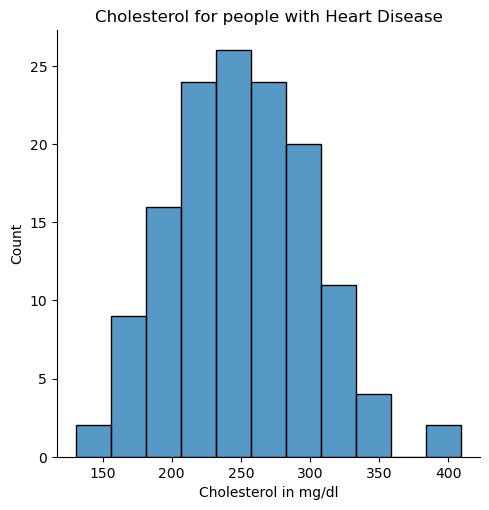

In [1437]:
# data for those with Heart Disease
sb.displot(heart_disease['chol'])
mplot.title("Cholesterol for people with Heart Disease")
mplot.xlabel("Cholesterol in mg/dl")
mplot.show()

The data has a normal distribution. Below we will check the data for those without heart disease. 

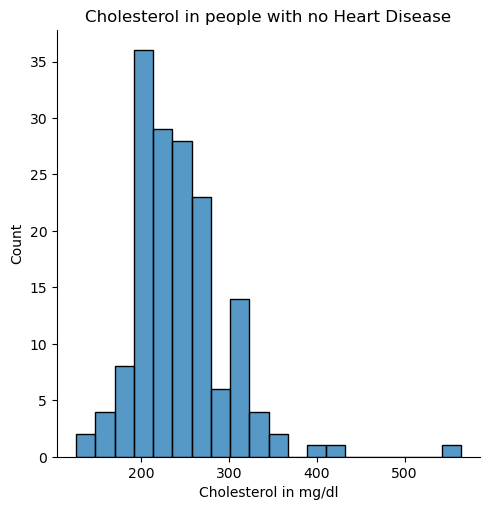

In [1438]:
sb.displot(no_heart_disease['chol'])
mplot.title("Cholesterol in people with no Heart Disease")
mplot.xlabel("Cholesterol in mg/dl")
mplot.show()

This also has a normal distribution for the most part with some outliers. Now let's generate some data. 

In [1439]:
# stats of people with heart disease
heart_disease['chol'].describe()

count    138.000000
mean     251.717391
std       49.524305
min      131.000000
25%      218.000000
50%      251.000000
75%      283.750000
max      409.000000
Name: chol, dtype: float64

In [1440]:
count_diagnosis = gen_data.groupby('diagnosis').size().reset_index(name='Count')


no_hd_count = count_diagnosis.loc[count_diagnosis['diagnosis'] == 0, 'Count'].values[0]
hd_count = count_diagnosis.loc[count_diagnosis['diagnosis'] == 1, 'Count'].values[0]


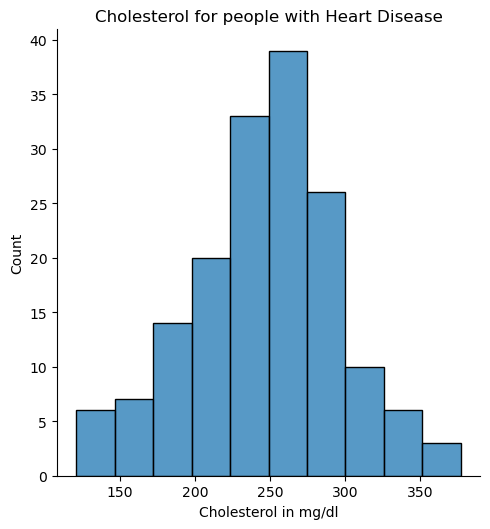

In [1441]:
colestrol_heart_disease = np.random.normal(250, 49, hd_count)
sb.displot(colestrol_heart_disease, bins=10)
mplot.title("Cholesterol for people with Heart Disease")
mplot.xlabel("Cholesterol in mg/dl")
mplot.show()

The data shows a similar distribution to the original data for those with heart disease. No ontp those with no heart disease.

In [1442]:
# stats of people with no heart disease
no_heart_disease['chol'].describe()

count    159.000000
mean     243.559748
std       53.920897
min      126.000000
25%      208.500000
50%      236.000000
75%      268.500000
max      564.000000
Name: chol, dtype: float64

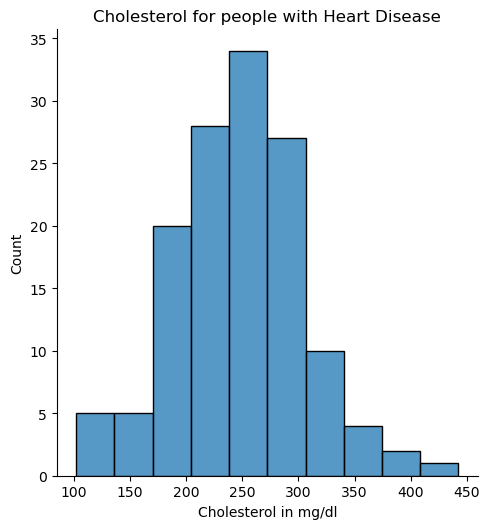

In [1443]:
colestrol_no_heart_disease = np.random.normal(243, 53, no_hd_count)
sb.displot(colestrol_no_heart_disease, bins=10)
mplot.title("Cholesterol for people with Heart Disease")
mplot.xlabel("Cholesterol in mg/dl")
mplot.show()

Once again, it seems to be follow a similar pattern to original data for people without heart disease.

We now have the distribution so we must split the generated data and then we can join it to form the new dataset for cholestrol.

In [1444]:
hd = gen_data.loc[gen_data["diagnosis"]==1]
nohd = gen_data.loc[gen_data["diagnosis"]==0]

In [1445]:
hd['chol'] = colestrol_heart_disease

In [1446]:
nohd['chol'] = colestrol_no_heart_disease

In [1447]:
# join both values as one
df= pd.concat([hd, nohd])

In [1448]:
# set generated cholestrol to be the calculated value
gen_data['chol'] = df['chol'].values

# ensure data type matches that of orginal data set
gen_data['chol'] = gen_data.chol.astype('float64') 

We have now created our generated dataset. Now let's look to examine how it compares to the original:

In [1449]:
# original data 
heart_data.describe()

,age,chol,sex,cp,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,247.350168,0.676768,3.158249,0.464646
std,9.049736,51.997583,0.468500,0.964859,0.499590
min,29.000000,126.000000,0.000000,1.000000,0.000000
25%,48.000000,211.000000,0.000000,3.000000,0.000000
50%,56.000000,243.000000,1.000000,3.000000,0.000000
75%,61.000000,276.000000,1.000000,4.000000,1.000000
max,77.000000,564.000000,1.000000,4.000000,1.000000


In [1450]:
# generated data
gen_data.describe()

,age,chol,sex,cp,diagnosis
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,55.226667,247.686262,0.620000,3.100000,0.546667
std,9.361307,52.349426,0.486197,1.032903,0.498649
min,29.000000,102.079047,0.000000,1.000000,0.000000
25%,49.000000,215.020050,0.000000,2.000000,0.000000
50%,55.500000,249.810852,1.000000,3.000000,1.000000
75%,61.000000,282.611302,1.000000,4.000000,1.000000
max,87.000000,442.517647,1.000000,4.000000,1.000000


We can see that the genrated dataset is a close match for the original dataset when we look at stats. The cpmparitive graphs in this project also give furthur evidience towards this.